In this file i would like to find out wath kind of customers buy products in mall client.
At the beginning, I would like to check and visualize if there is any correlation between age, gender, salary of each person and amount of money which they spend nad based on this information i would like to divide people on some groups.



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [47]:
data=pd.read_csv("Mall_Customers.csv")

In [48]:
gender=pd.get_dummies(data.Gender,)
data['Gender_int']=gender['Male'] # setting Gender Male as 1 and Woman as 0 
data=data.drop(columns="Gender")
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_int
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [49]:
male=data[data.Gender_int==1]
female=data[data.Gender_int==0]
male_age_mean=male.Age.mean()
male_score_mean=male['Spending Score (1-100)'].mean()
female_age_mean=female.Age.mean()
female_score_mean=female['Spending Score (1-100)'].mean()

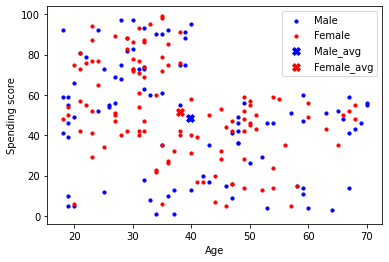

In [50]:
male_plot=plt.scatter(male.Age,male['Spending Score (1-100)'], label="Male", s=10, color="b")
female_plot=plt.scatter(female.Age,female['Spending Score (1-100)'], label="Female", s=10 ,color="r")
male_avg=plt.scatter(male_age_mean,male_score_mean, label="Male_avg", s=60, marker="X", color="b")
female_avg=plt.scatter(female_age_mean,female_score_mean, label="Female_avg", s=60, marker="X", color="r")
plt.ylabel("Spending score")
plt.xlabel("Age")
plt.legend();


We can see that there is similar value of spending score for average female and average male.

But we can see that people over 40 have spending score below 60 points.

Let's take a look if there is any correlation between spending score and annual salary.
But at the beginning, i divide our dataset for people under and above 40.



In [51]:
under_40= data[data.Age<40]
above_40= data[data.Age>=40]

In [52]:
# Linear regression
a40plus,b40plus=np.polyfit(above_40["Annual Income (k$)"], above_40['Spending Score (1-100)'],1)
a40minus,b40minus=np.polyfit(under_40["Annual Income (k$)"], under_40['Spending Score (1-100)'],1)

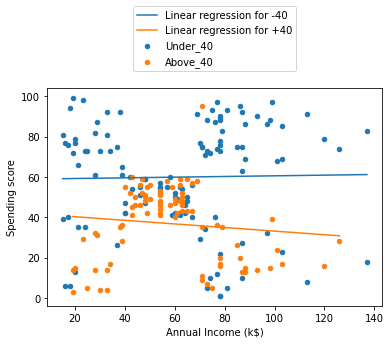

In [53]:
u40=plt.scatter(under_40["Annual Income (k$)"], under_40['Spending Score (1-100)'], label="Under_40", s=20)
a40=plt.scatter(above_40["Annual Income (k$)"], above_40['Spending Score (1-100)'], label="Above_40",s=20)
plt.plot(under_40["Annual Income (k$)"],a40minus*under_40["Annual Income (k$)"]+b40minus, label="Linear regression for -40")

plt.plot(above_40["Annual Income (k$)"],a40plus*above_40["Annual Income (k$)"]+b40plus, label="Linear regression for +40")

plt.ylabel("Spending score")
plt.xlabel("Annual Income (k$)")

plt.legend(loc='upper center',bbox_to_anchor=(0.5,1.4));


Looking at this plot we can reach the conclusion that people under 40 have greater spending score than people above 40 ( we can came to this conclusion looking at first plot as well). 

Another interesting thing is that if person is above 40 and earns more, the spending score is descreasing!


--------------------------------------------------------------------------------------------
Now i would like to use Machine learning to segment our customers into some different profiles.

One of the opitions is to use K-means algorithm. More on that: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a.

To get reliable outcome i have to standarised all the data. More on that why i have choosen standardization in video :https://www.youtube.com/watch?v=mnKm3YP56PY


In [54]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_int
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


Gender_int column has two values: 0 and 1, so it is not necessery to standarised this column.

Let's create new tabel with standarised values.

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler= StandardScaler()

In [57]:
col=['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
data_std=data[col]
cols=scaler.fit(data_std.values)
data_std=cols.transform(data_std.values)
data_std=pd.DataFrame(data_std, columns=col)
data_std['Gender']=data['Gender_int']
data_std

,Annual Income (k$),Age,Spending Score (1-100),Gender
0,-1.738999,-1.424569,-0.434801,1
1,-1.738999,-1.281035,1.195704,1
2,-1.700830,-1.352802,-1.715913,0
3,-1.700830,-1.137502,1.040418,0
4,-1.662660,-0.563369,-0.395980,0
...,...,...,...,...
195,2.268791,-0.276302,1.118061,0
196,2.497807,0.441365,-0.861839,0
197,2.497807,-0.491602,0.923953,1
198,2.917671,-0.491602,-1.250054,1


A silhouette coefficient is a metric used to evaluate the quality of clusters created by the algorithm. More on that: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

In [60]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

For small data as this one (200 rows), the number of clusters should not be to large. I decided to analyse up to 9 clusters.

In [116]:
score_kmean={}
for i in range(2,10): # minimal amount of clusters should be greater than 1 
    KMean= KMeans(n_clusters=i)
    KMean.fit(data_std)
    label=KMean.predict(data_std)
    score_kmean[i]=silhouette_score(data_std, label)

In [117]:
max(score, key=score.get)# getting key of cluster where the poinst are well apart from each other

6

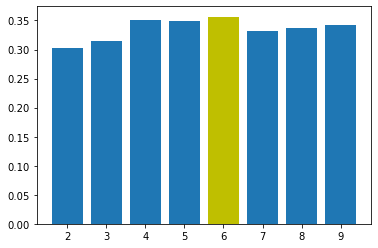

In [119]:
plt.bar(x=score_kmean.keys(), height=score_kmean.values());
plt.bar( x=max(score_kmean, key=score_kmean.get), height=score_kmean[max(score, key=score.get)], color="y");

In this exaple the best amount of clusters is 6. The output for 6 is around 0.35 and it is not so bad output.

Let's visualize this data and try to divide profiles of customers.

In [128]:
KMean= KMeans(n_clusters=6) # predicting cluster to each row in dataframe
KMean.fit(data_std)
label=KMean.predict(data_std)
data['cluster']=label

In [131]:
data.head(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_int,cluster
0,1,19,15,39,1,4
1,2,21,15,81,1,4
2,3,20,16,6,0,3


In [132]:
from mpl_toolkits import mplot3d

In [175]:
data1=data[data.cluster==1]
data2=data[data.cluster==2]
data3=data[data.cluster==3]
data4=data[data.cluster==4]
data5=data[data.cluster==5]
data6=data[data.cluster==0]

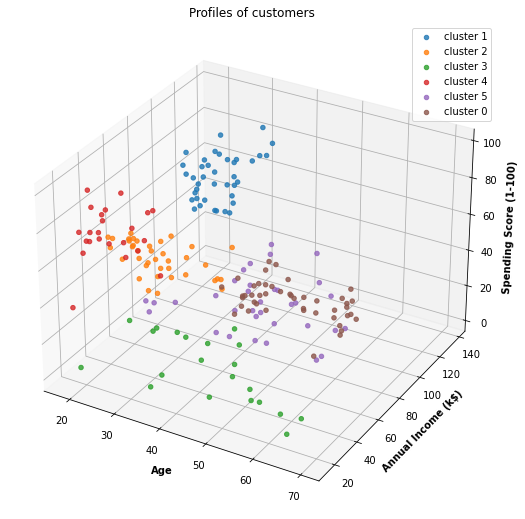

In [201]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.grid (color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

 

ax.scatter3D(data1.Age, data1['Annual Income (k$)'],data1['Spending Score (1-100)'],alpha = 0.8, label="cluster 1")
ax.scatter3D(data2.Age, data2['Annual Income (k$)'],data2['Spending Score (1-100)'],alpha = 0.8, label="cluster 2")
ax.scatter3D(data3.Age, data3['Annual Income (k$)'],data3['Spending Score (1-100)'],alpha = 0.8, label="cluster 3")
ax.scatter3D(data4.Age, data4['Annual Income (k$)'],data4['Spending Score (1-100)'],alpha = 0.8, label="cluster 4")
ax.scatter3D(data5.Age, data5['Annual Income (k$)'],data5['Spending Score (1-100)'],alpha = 0.8, label="cluster 5")
ax.scatter3D(data6.Age, data6['Annual Income (k$)'],data6['Spending Score (1-100)'],alpha = 0.8, label="cluster 0")

                
 
plt.title("Profiles of customers")
ax.set_xlabel('Age', fontweight ='bold')
ax.set_ylabel('Annual Income (k$)', fontweight ='bold')
ax.set_zlabel('Spending Score (1-100)', fontweight ='bold')
ax.legend();

In [195]:
data_avg=data.groupby('cluster').mean()
data_avg

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_int
cluster,,,,,
0,83.777778,56.333333,54.266667,49.066667,0.422222
1,162.000000,32.692308,86.538462,82.128205,0.461538
2,90.052632,27.000000,56.657895,49.131579,0.342105
3,23.190476,45.523810,26.285714,19.380952,0.380952
4,22.130435,25.000000,25.260870,77.608696,0.434783
5,164.529412,41.264706,88.500000,16.764706,0.588235


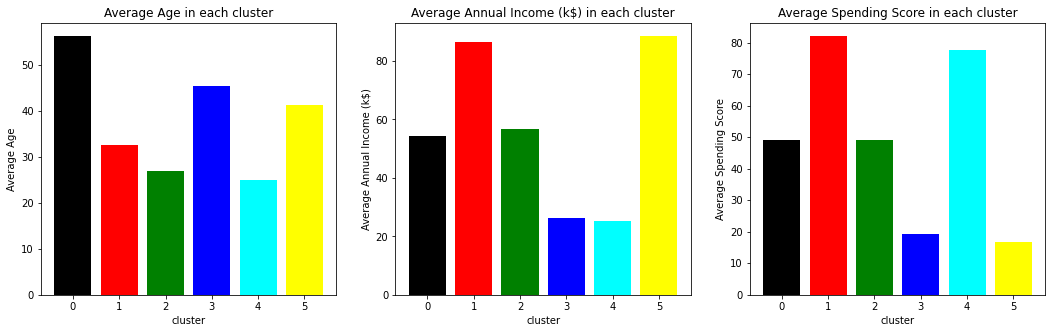

In [209]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
ax1=ax[0]
ax2=ax[1]
ax3=ax[2]
ax1.bar(data_avg.index, data_avg.Age, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'])
ax1.set_title("Average Age in each cluster")
ax1.set_xlabel("cluster")
ax1.set_ylabel("Average Age")
ax2.bar(data_avg.index, data_avg['Annual Income (k$)'], color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'])
ax2.set_title("Average Annual Income (k$) in each cluster")
ax2.set_xlabel("cluster")
ax2.set_ylabel("Average Annual Income (k$)")
ax3.bar(data_avg.index, data_avg['Spending Score (1-100)'], color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'])
ax3.set_title("Average Spending Score in each cluster")
ax3.set_xlabel("cluster")
ax3.set_ylabel("Average Spending Score");

We can some group of customers. 
For exaple:Cluster 0 - old peope with medium annual income and medium spending score. Cluster 1 is a group of people that average age is 30 with high income (over 70 k$) having spending score above 80. Cluster 2 young people with medium annual income have large spending score. Cluster 3 - people in different age with low annual income have low spending score. Cluster 4 young peope with low level of income and high spending score. Cluster 5 we can find out that it usually medium or old people with high income and low spending score. 

Conclusion:

Based on this plot we can reach the conclusion that major of young people have medium or high spending score( even with low level of income). Medium-aged and old people have usually lower spending score than young people (no matter how high is annual income). Young people with high income have the highest spending score. 
